In [61]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pymc3 as pm

In [62]:
df = pd.read_csv('D:/Germany/Study Files-TUD/TU Dortmund/--------Semester-8-Winter Term--------2023-2024/Applied Bayesian Data Analysis/Project/booking.csv')

In [63]:
df.head(3)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled


In [64]:
df.rename(columns={'Booking_ID':'Booking_ID','number of adults':'number_of_adults', 'number of children':'number_of_children',
                   'number of weekend nights':'number_of_weekend_nights', 'number of week nights':'number_of_week_nights',
                   'type of meal':'type_of_meal','car parking space':'car_parking_space', 'room type':'room_type',
                   'lead time':'lead_time', 'market segment type':'market_segment_type','number of adults':'number_of_adults', 'average price':'average_price','special requests':'special_requests', 
                  'date of reservation':'date_of_reservation','booking status':'booking_status'}, inplace=True)

In [65]:
df.head(3)

,Booking_ID,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,P-C,P-not-C,average_price,special_requests,date_of_reservation,booking_status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled


In [66]:
df.tail(3)

,Booking_ID,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,P-C,P-not-C,average_price,special_requests,date_of_reservation,booking_status
36282,INN36284,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
36283,INN36285,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled
36284,INN36286,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,Online,0,0,0,133.44,3,10/18/2018,Not_Canceled


In [67]:
df.describe

<bound method NDFrame.describe of       Booking_ID  number_of_adults  number_of_children  \
0       INN00001                 1                   1   
1       INN00002                 1                   0   
2       INN00003                 2                   1   
3       INN00004                 1                   0   
4       INN00005                 1                   0   
...          ...               ...                 ...   
36280   INN36282                 2                   0   
36281   INN36283                 2                   0   
36282   INN36284                 2                   0   
36283   INN36285                 3                   0   
36284   INN36286                 2                   0   

       number_of_weekend_nights  number_of_week_nights  type_of_meal  \
0                             2                      5   Meal Plan 1   
1                             1                      3  Not Selected   
2                             1                      

In [68]:
df.shape

(36285, 17)

In [69]:
df.columns

Index(['Booking_ID', 'number_of_adults', 'number_of_children',
       'number_of_weekend_nights', 'number_of_week_nights', 'type_of_meal',
       'car_parking_space', 'room_type', 'lead_time', 'market_segment_type',
       'repeated', 'P-C', 'P-not-C', 'average_price', 'special_requests',
       'date_of_reservation', 'booking_status'],
      dtype='object')

In [70]:
df.isna().sum()

Booking_ID                  0
number_of_adults            0
number_of_children          0
number_of_weekend_nights    0
number_of_week_nights       0
type_of_meal                0
car_parking_space           0
room_type                   0
lead_time                   0
market_segment_type         0
repeated                    0
P-C                         0
P-not-C                     0
average_price               0
special_requests            0
date_of_reservation         0
booking_status              0
dtype: int64

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number_of_adults          36285 non-null  int64  
 2   number_of_children        36285 non-null  int64  
 3   number_of_weekend_nights  36285 non-null  int64  
 4   number_of_week_nights     36285 non-null  int64  
 5   type_of_meal              36285 non-null  object 
 6   car_parking_space         36285 non-null  int64  
 7   room_type                 36285 non-null  object 
 8   lead_time                 36285 non-null  int64  
 9   market_segment_type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average_price             36285 non-null  float64
 14  specia

In [72]:
df['booking_status'].value_counts()
print(df['booking_status'].value_counts())

Not_Canceled    24396
Canceled        11889
Name: booking_status, dtype: int64


In [73]:
df = df.drop(['Booking_ID', 'date_of_reservation'], axis=1)

In [74]:
df

,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,P-C,P-not-C,average_price,special_requests,booking_status
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,Not_Canceled
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,Canceled
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,Canceled
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,Canceled
36281,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,Not_Canceled
36282,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,Not_Canceled
36283,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,Not_Canceled


In [75]:
df = pd.get_dummies(df, columns=['type_of_meal', 'room_type', 'market_segment_type'])

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   number_of_adults                   36285 non-null  int64  
 1   number_of_children                 36285 non-null  int64  
 2   number_of_weekend_nights           36285 non-null  int64  
 3   number_of_week_nights              36285 non-null  int64  
 4   car_parking_space                  36285 non-null  int64  
 5   lead_time                          36285 non-null  int64  
 6   repeated                           36285 non-null  int64  
 7   P-C                                36285 non-null  int64  
 8   P-not-C                            36285 non-null  int64  
 9   average_price                      36285 non-null  float64
 10  special_requests                   36285 non-null  int64  
 11  booking_status                     36285 non-null  obj

In [77]:
X = df.drop('booking_status', axis=1)
y = df['booking_status']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [79]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [80]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)
print(feature_importances)

lead_time                            0.413456
average_price                        0.237487
special_requests                     0.106761
number_of_week_nights                0.064994
number_of_weekend_nights             0.042833
market_segment_type_Online           0.029233
number_of_adults                     0.027091
market_segment_type_Offline          0.015872
number_of_children                   0.007732
type_of_meal_Meal Plan 2             0.007613
car_parking_space                    0.007110
type_of_meal_Meal Plan 1             0.006900
room_type_Room_Type 1                0.006250
room_type_Room_Type 4                0.005567
market_segment_type_Corporate        0.005442
type_of_meal_Not Selected            0.004997
repeated                             0.001870
P-not-C                              0.001852
room_type_Room_Type 2                0.001828
room_type_Room_Type 5                0.001709
room_type_Room_Type 6                0.001630
market_segment_type_Complementary 

In [81]:
print(df.columns)

Index(['number_of_adults', 'number_of_children', 'number_of_weekend_nights',
       'number_of_week_nights', 'car_parking_space', 'lead_time', 'repeated',
       'P-C', 'P-not-C', 'average_price', 'special_requests', 'booking_status',
       'type_of_meal_Meal Plan 1', 'type_of_meal_Meal Plan 2',
       'type_of_meal_Meal Plan 3', 'type_of_meal_Not Selected',
       'room_type_Room_Type 1', 'room_type_Room_Type 2',
       'room_type_Room_Type 3', 'room_type_Room_Type 4',
       'room_type_Room_Type 5', 'room_type_Room_Type 6',
       'room_type_Room_Type 7', 'market_segment_type_Aviation',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online'],
      dtype='object')


####GLM''''''####

In [68]:
with pm.Model() as bayesian_model:
    # Define your Bayesian model here
    # For example, use a logistic regression model
    pm.glm.GLM.from_formula('booking_status ~ lead_time + number_of_adults + number_of_children + number_of_weekend_nights + number_of_week_nights + special_requests', df)
    trace = pm.sample(10, tune=50)

# Check the summary of the Bayesian model  #average_price is also important. so need to add next training.
print(pm.summary(trace))


The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
C:\Users\Jishan\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 10 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\Jishan\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Jishan\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, special_requests, number_of_week

Sampling 4 chains for 50 tune and 10 draw iterations (200 + 40 draws total) took 2182 seconds.
C:\Users\Jishan\anaconda3\lib\site-packages\pymc3\sampling.py:659: UserWarning: The number of samples is too small to check convergence reliably.
  warnings.warn("The number of samples is too small to check convergence reliably.")
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\Jishan\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


                           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
Intercept                 0.052  0.625  -0.984    0.553      0.198    0.144   
lead_time                -0.087  0.126  -0.304    0.002      0.040    0.029   
number_of_adults          0.095  0.289  -0.260    0.538      0.091    0.067   
number_of_children        0.033  0.656  -0.918    0.824      0.207    0.151   
number_of_weekend_nights  0.096  0.655  -0.775    0.766      0.207    0.151   
number_of_week_nights    -0.135  0.396  -0.601    0.464      0.125    0.091   
special_requests          0.505  0.564  -0.447    0.993      0.178    0.130   
sd                        1.100  0.654   0.385    1.971      0.207    0.151   

                          ess_bulk  ess_tail  r_hat  
Intercept                     10.0      20.0   4.46  
lead_time                     10.0      20.0   4.10  
number_of_adults              11.0      28.0   3.52  
number_of_children            11.0      20.0   3.68  
number_of_weekend_

In [94]:
# Extract predictions from the trace for a specific iteration
iteration = 0  # Change this to the desired iteration
lead_time_values = trace['lead_time'][iteration]
print("Lead time values:", lead_time_values)

# Check the shape (length) of y_test and lead_time_values
print("Length of y_test:", len(y_test))
print("Shape of lead_time_values:", lead_time_values.shape)

# Print lead_time_values to understand its content
print("Values in lead_time_values:", lead_time_values)

# Check if the condition is resulting in a valid array
condition_result = lead_time_values < 0.01
print("Shape of condition_result:", condition_result.shape)

# Evaluate the performance of the Bayesian model
accuracy = accuracy_score(y_test, condition_result.astype(int))
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
# print(classification_report(y_test, condition_result.astype(int)))


Lead time values: -0.30433397627705383
Length of y_test: 10886
Shape of lead_time_values: ()
Values in lead_time_values: -0.30433397627705383
Shape of condition_result: ()


TypeError: Singleton array 1 cannot be considered a valid collection.

In [72]:
X_train.shape

(25399, 27)

In [73]:
X_test.shape

(10886, 27)

In [74]:
y_train.shape

(25399,)

In [75]:
y_test.shape

(10886,)

In [77]:
# List all variable names in the trace
print(trace.varnames)


['Intercept', 'lead_time', 'number_of_adults', 'number_of_children', 'number_of_weekend_nights', 'number_of_week_nights', 'special_requests', 'sd_log__', 'sd']


#average_price is also important. so need to add next training. ####Binomial-Beta Model####

C:\Users\Jishan\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [p]


C:\Users\Jishan\anaconda3\lib\site-packages\theano\scalar\basic.py:2851: RuntimeWarning: divide by zero encountered in true_divide
  return np.float32(1.0) / x
C:\Users\Jishan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Jishan\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in impl (vectorized)
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Jishan\anaconda3\lib\site-packages\theano\scalar\basic.py:3133: RuntimeWarning: overflow encountered in expm1
  return np.expm1(x)
C:\Users\Jishan\anaconda3\lib\site-packages\theano\scalar\basic.py:2893: RuntimeWarning: divide by zero encountered in log
  return np.log(x)


Sampling 2 chains for 10 tune and 100 draw iterations (20 + 200 draws total) took 79 seconds.
C:\Users\Jishan\anaconda3\lib\site-packages\arviz\stats\diagnostics.py:586: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
The chain contains only diverging samples. The model is probably misspecified.
The acceptance probability does not match the target. It is 0.0, but should be close to 0.8. Try to increase the number of tuning steps.
The chain contains only diverging samples. The model is probably misspecified.
The acceptance probability does not match the target. It is 0.0, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The number of effective samples is smaller than 10% for some parameters.
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users

    mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
p  0.525  0.154   0.371    0.679      0.105    0.087       2.0       2.0   

          r_hat  
p  9.806858e+15  


<AxesSubplot:title={'center':'p'}>

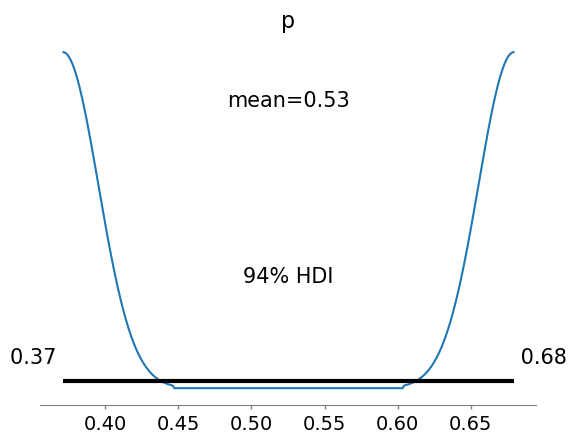

In [99]:
import pymc3 as pm
import pandas as pd
import arviz as az

# Assuming df is your DataFrame

# Encode 'booking_status' into binary format
df['booking_status'] = (df['booking_status'] == 'Canceled').astype(int)

with pm.Model() as bayesian_model:
    # Prior for the probability parameter (Beta distribution)
    p = pm.Beta('p', alpha=2, beta=2)
    
    # Likelihood (Binomial distribution)
    likelihood = pm.Binomial('likelihood', n=len(df['booking_status']), p=p, observed=df['booking_status'])
    
    # Sample from the posterior distribution
    trace = pm.sample(100, tune=10, cores=1)  # Adjust the number of samples and tuning steps as needed

# Check the summary of the Bayesian model
print(pm.summary(trace))

# Plot posterior distribution
az.plot_posterior(trace, var_names=['p'])


C:\Users\Jishan\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [p]


C:\Users\Jishan\anaconda3\lib\site-packages\theano\scalar\basic.py:2851: RuntimeWarning: divide by zero encountered in true_divide
  return np.float32(1.0) / x
C:\Users\Jishan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Jishan\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in impl (vectorized)
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Jishan\anaconda3\lib\site-packages\theano\scalar\basic.py:3133: RuntimeWarning: overflow encountered in expm1
  return np.expm1(x)
C:\Users\Jishan\anaconda3\lib\site-packages\theano\scalar\basic.py:2893: RuntimeWarning: divide by zero encountered in log
  return np.log(x)


Sampling 2 chains for 10 tune and 100 draw iterations (20 + 200 draws total) took 82 seconds.
The chain contains only diverging samples. The model is probably misspecified.
The acceptance probability does not match the target. It is 0.0, but should be close to 0.8. Try to increase the number of tuning steps.
The chain contains only diverging samples. The model is probably misspecified.
The acceptance probability does not match the target. It is 0.0, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The number of effective samples is smaller than 10% for some parameters.
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\Jishan\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful r

    mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
p  0.538  0.177   0.361    0.715       0.12      0.1       2.0       2.0   

          r_hat  
p  9.806858e+15  


C:\Users\Jishan\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


Probability that 'p' is greater than 0.5: 50.00%


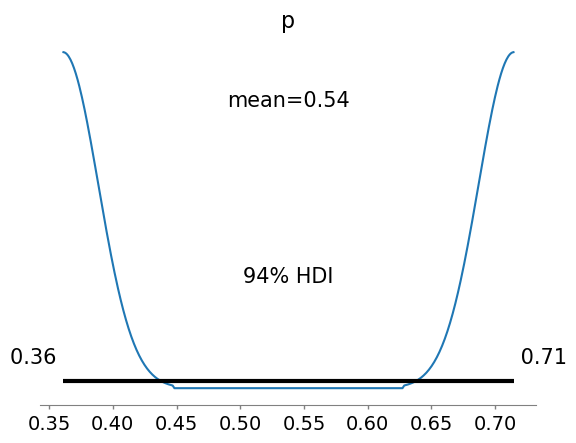

In [100]:
import pymc3 as pm
import pandas as pd
import arviz as az
from scipy.stats import percentileofscore

# Assuming df is your DataFrame

# Encode 'booking_status' into binary format
df['booking_status'] = (df['booking_status'] == 'Canceled').astype(int)

with pm.Model() as bayesian_model:
    # Prior for the probability parameter (Beta distribution)
    p = pm.Beta('p', alpha=2, beta=2)
    
    # Likelihood (Binomial distribution)
    likelihood = pm.Binomial('likelihood', n=len(df['booking_status']), p=p, observed=df['booking_status'])
    
    # Sample from the posterior distribution
    trace = pm.sample(100, tune=10, cores=1)  # Adjust the number of samples and tuning steps as needed

# Check the summary of the Bayesian model
print(pm.summary(trace))

# Plot posterior distribution
az.plot_posterior(trace, var_names=['p'])

# Hypothesis testing
# Example: Test if the probability 'p' is greater than 0.5
threshold = 0.5
posterior_prob_greater_than_threshold = percentileofscore(trace['p'], threshold)
print(f"Probability that 'p' is greater than {threshold}: {100 - posterior_prob_greater_than_threshold:.2f}%")


Negative-Binomial-Beta Model

In [ ]:
import pymc3 as pm
import pandas as pd
import arviz as az

# Assuming df is your DataFrame

# Encode 'booking_status' into binary format
df['booking_status'] = (df['booking_status'] == 'Canceled').astype(int)

with pm.Model() as bayesian_model:
    # Prior for the probability parameter (Beta distribution)
    p = pm.Beta('p', alpha=2, beta=2)
    
    # Negative Binomial likelihood
    likelihood = pm.NegativeBinomial('likelihood', mu=p, alpha=2, observed=df['booking_status'])
    
    # Sample from the posterior distribution
    trace = pm.sample(100, tune=10, cores=1)  # Adjust the number of samples and tuning steps as needed

# Check the summary of the Bayesian model
print(pm.summary(trace))

# Plot posterior distribution
az.plot_posterior(trace, var_names=['p'])


C:\Users\Jishan\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [p]


C:\Users\Jishan\anaconda3\lib\site-packages\theano\scalar\basic.py:2851: RuntimeWarning: divide by zero encountered in true_divide
  return np.float32(1.0) / x
C:\Users\Jishan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Jishan\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in impl (vectorized)
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Jishan\anaconda3\lib\site-packages\theano\scalar\basic.py:2893: RuntimeWarning: divide by zero encountered in log
  return np.log(x)
C:\Users\Jishan\anaconda3\lib\site-packages\theano\scalar\basic.py:3133: RuntimeWarning: overflow encountered in expm1
  return np.expm1(x)
C:\Users\Jishan\anaconda3\lib\site-packages\theano\scalar\basic.py:3061: RuntimeWarning: overflow encountered in exp
  return np.exp(x)


In [ ]:
import pymc3 as pm
import arviz as az
import numpy as np

# Assuming you already have the trained model (bayesian_model) and trace from the training phase

# Assuming test_df is your testing DataFrame
# Encode 'booking_status' into binary format
test_df['booking_status'] = (test_df['booking_status'] == 'Canceled').astype(int)

# Make predictions on the test data using the trained model
with bayesian_model:
    pm.set_data({'p': trace['p']})  # Set the posterior samples for the probability parameter
    
    # Negative Binomial likelihood for the test data
    test_likelihood = pm.NegativeBinomial('test_likelihood', mu=trace['p'], alpha=2, observed=test_df['booking_status'])
    
    # Sample from the posterior distribution for the test likelihood
    test_trace = pm.sample_posterior_predictive(trace, samples=500)

# Evaluate the predictions on the test data as needed
# For example, you can calculate summary statistics or use other metrics
# based on the test_trace and test_df['booking_status']

# Plot posterior predictive checks
az.plot_ppc(az.from_pymc3(trace, posterior_predictive=test_trace), figsize=(12, 6), mean=False)


Poisson-Gamma Model 

In [ ]:
import pymc3 as pm
import pandas as pd
import arviz as az

# Assuming df is your DataFrame

# Encode 'booking_status' into binary format
df['booking_status'] = (df['booking_status'] == 'Canceled').astype(int)

with pm.Model() as bayesian_model:
    # Prior for the rate parameter (Gamma distribution)
    rate = pm.Gamma('rate', alpha=2, beta=2)
    
    # Poisson likelihood
    likelihood = pm.Poisson('likelihood', mu=rate, observed=df['booking_status'])
    
    # Sample from the posterior distribution
    trace = pm.sample(100, tune=10, cores=1)  # Adjust the number of samples and tuning steps as needed

# Check the summary of the Bayesian model
print(pm.summary(trace))

# Plot posterior distribution
az.plot_posterior(trace, var_names=['rate'])


In [ ]:
import pymc3 as pm
import arviz as az
import numpy as np

# Assuming you already have the trained model (bayesian_model) and trace from the training phase

# Assuming test_df is your testing DataFrame
# Encode 'booking_status' into binary format
test_df['booking_status'] = (test_df['booking_status'] == 'Canceled').astype(int)

# Make predictions on the test data using the trained model
with bayesian_model:
    pm.set_data({'rate': trace['rate']})  # Set the posterior samples for the rate parameter
    
    # Poisson likelihood for the test data
    test_likelihood = pm.Poisson('test_likelihood', mu=trace['rate'], observed=test_df['booking_status'])
    
    # Sample from the posterior distribution for the test likelihood
    test_trace = pm.sample_posterior_predictive(trace, samples=500)

# Evaluate the predictions on the test data as needed
# For example, you can calculate summary statistics or use other metrics
# based on the test_trace and test_df['booking_status']

# Plot posterior predictive checks
az.plot_ppc(az.from_pymc3(trace, posterior_predictive=test_trace), figsize=(12, 6), mean=False)


Exponential-Gamma Model

In [ ]:
import pymc3 as pm
import pandas as pd
import arviz as az

# Assuming df is your DataFrame

# Encode 'booking_status' into binary format
df['booking_status'] = (df['booking_status'] == 'Canceled').astype(int)

with pm.Model() as bayesian_model:
    # Prior for the rate parameter (Gamma distribution)
    rate = pm.Gamma('rate', alpha=2, beta=2)
    
    # Exponential likelihood
    likelihood = pm.Exponential('likelihood', lam=rate, observed=df['booking_status'])
    
    # Sample from the posterior distribution
    trace = pm.sample(100, tune=10, cores=1)  # Adjust the number of samples and tuning steps as needed

# Check the summary of the Bayesian model
print(pm.summary(trace))

# Plot posterior distribution
az.plot_posterior(trace, var_names=['rate'])


In [ ]:
import pymc3 as pm
import arviz as az
import numpy as np

# Assuming you already have the trained model (bayesian_model) and trace from the training phase

# Assuming test_df is your testing DataFrame
# Encode 'booking_status' into binary format
test_df['booking_status'] = (test_df['booking_status'] == 'Canceled').astype(int)

# Make predictions on the test data using the trained model
with bayesian_model:
    pm.set_data({'rate': trace['rate']})  # Set the posterior samples for the rate parameter
    
    # Exponential likelihood for the test data
    test_likelihood = pm.Exponential('test_likelihood', lam=trace['rate'], observed=test_df['booking_status'])
    
    # Sample from the posterior distribution for the test likelihood
    test_trace = pm.sample_posterior_predictive(trace, samples=500)

# Evaluate the predictions on the test data as needed
# For example, you can calculate summary statistics or use other metrics
# based on the test_trace and test_df['booking_status']

# Plot posterior predictive checks
az.plot_ppc(az.from_pymc3(trace, posterior_predictive=test_trace), figsize=(12, 6), mean=False)

Part-2 --- After that, Customer Satisfaction Analysis: Apply Bayesian analytics to assess customer satisfaction by analyzing feedback and preferences. Use variables like type of meal, car parking space availability, and room type to identify patterns that contribute to positive experiences. Implement strategies to enhance customer satisfaction and encourage repeat bookings.

In [22]:
print(df.columns)

Index(['number_of_adults', 'number_of_children', 'number_of_weekend_nights',
       'number_of_week_nights', 'car_parking_space', 'lead_time', 'repeated',
       'P-C', 'P-not-C', 'average_price', 'special_requests', 'booking_status',
       'type_of_meal_Meal Plan 1', 'type_of_meal_Meal Plan 2',
       'type_of_meal_Meal Plan 3', 'type_of_meal_Not Selected',
       'room_type_Room_Type 1', 'room_type_Room_Type 2',
       'room_type_Room_Type 3', 'room_type_Room_Type 4',
       'room_type_Room_Type 5', 'room_type_Room_Type 6',
       'room_type_Room_Type 7', 'market_segment_type_Aviation',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online'],
      dtype='object')


In [23]:
selected_columns = ['type_of_meal_Meal Plan 1', 'type_of_meal_Meal Plan 2',
                     'type_of_meal_Meal Plan 3', 'car_parking_space',
                     'room_type_Room_Type 1', 'room_type_Room_Type 2',
                     'room_type_Room_Type 3', 'special_requests', 'repeated', 'booking_status']
selected_df = df[selected_columns]


<Figure size 640x480 with 0 Axes>

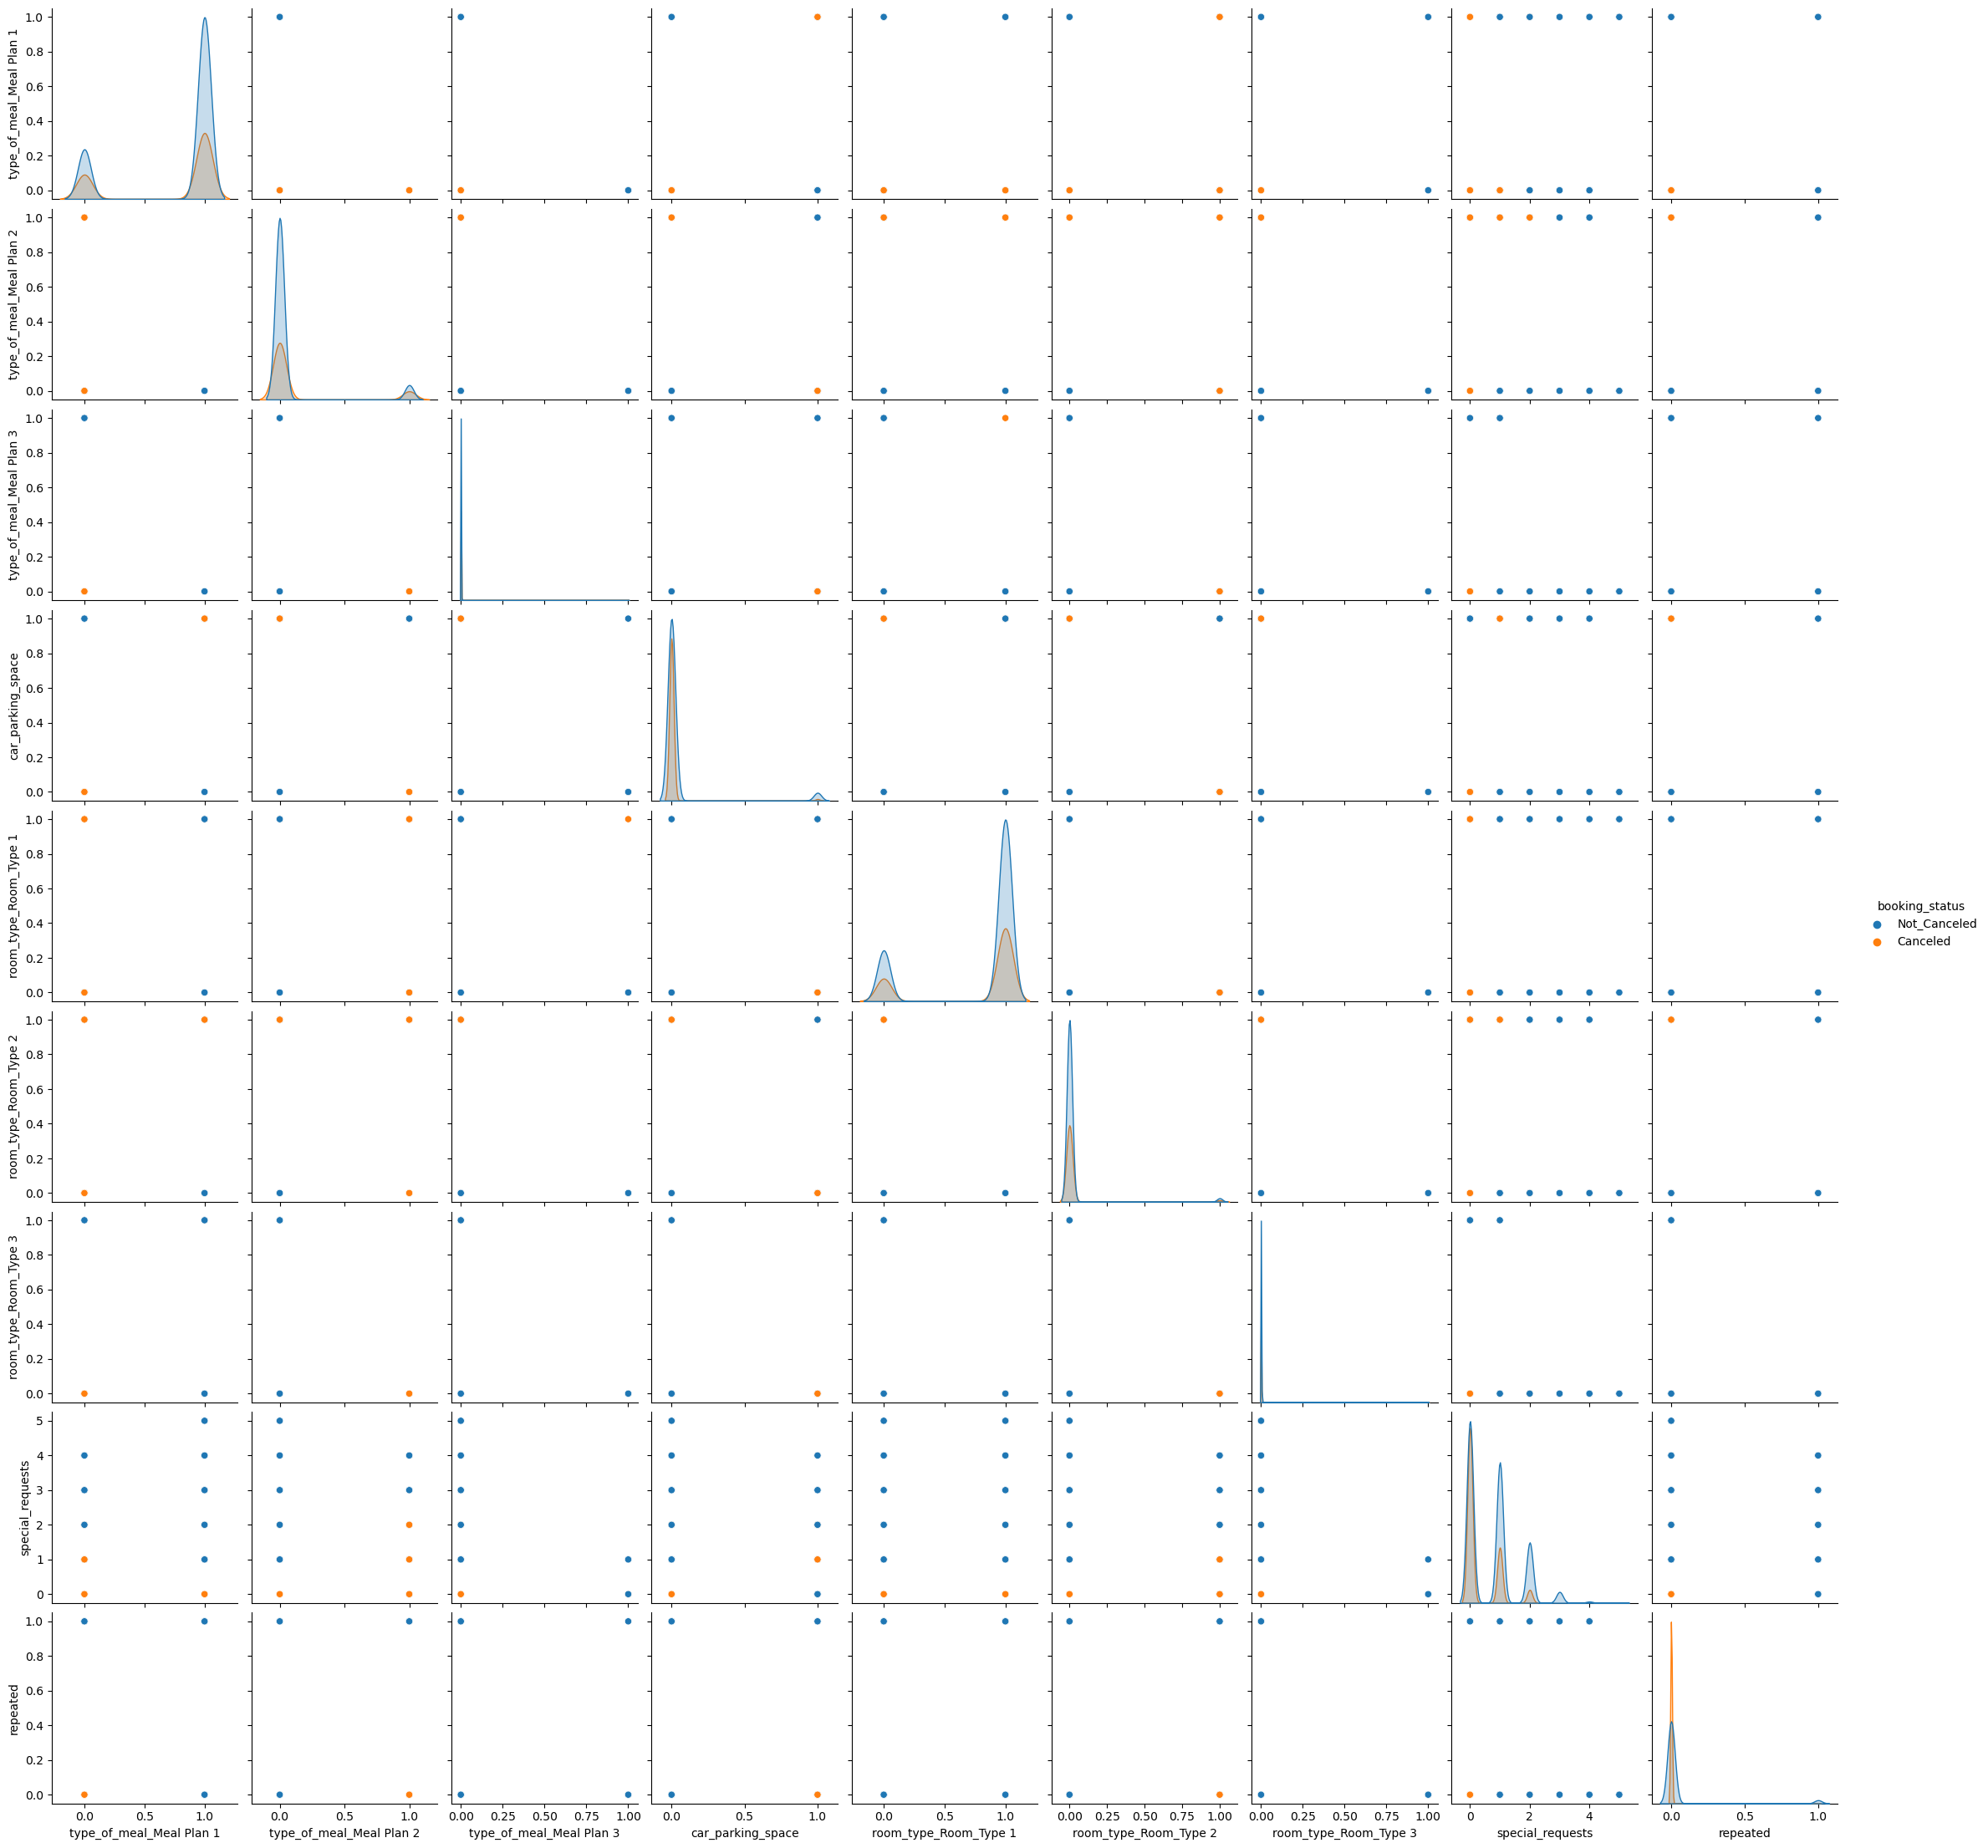

In [26]:
# Example: Pairplot for selected variables
sns.pairplot(selected_df, hue='booking_status', diag_kind='kde')
plt.savefig('tft.png')
plt.show()


C:\Users\Jishan\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 10 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\Jishan\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Jishan\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [prior_special_requests]


Sampling 4 chains for 10 tune and 10 draw iterations (40 + 40 draws total) took 57 seconds.
C:\Users\Jishan\anaconda3\lib\site-packages\pymc3\sampling.py:659: UserWarning: The number of samples is too small to check convergence reliably.
  warnings.warn("The number of samples is too small to check convergence reliably.")
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\Jishan\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


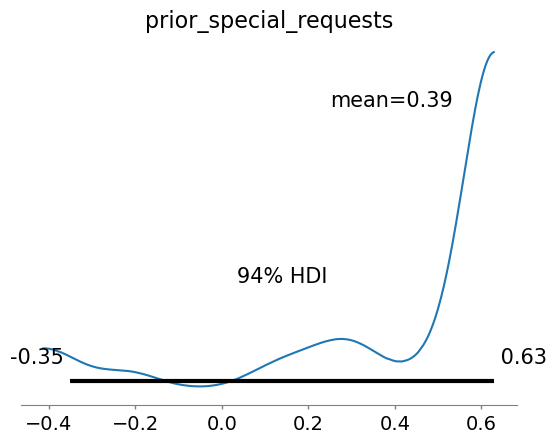

In [27]:
# Example: Bayesian analysis for special requests
with pm.Model() as model:
    # Define prior
    prior_special_requests = pm.Normal('prior_special_requests', mu=0, sd=1)
    
    # Define likelihood
    likelihood = pm.Normal('likelihood', mu=prior_special_requests, sd=1, observed=selected_df['special_requests'])
    
    # Sample from the posterior
    trace = pm.sample(10, tune=10)

# Plot the posterior distribution
pm.plot_posterior(trace)
plt.show()


In [32]:
print(df.columns)

Index(['number_of_adults', 'number_of_children', 'number_of_weekend_nights',
       'number_of_week_nights', 'car_parking_space', 'lead_time', 'repeated',
       'P-C', 'P-not-C', 'average_price', 'special_requests', 'booking_status',
       'type_of_meal_Meal Plan 1', 'type_of_meal_Meal Plan 2',
       'type_of_meal_Meal Plan 3', 'type_of_meal_Not Selected',
       'room_type_Room_Type 1', 'room_type_Room_Type 2',
       'room_type_Room_Type 3', 'room_type_Room_Type 4',
       'room_type_Room_Type 5', 'room_type_Room_Type 6',
       'room_type_Room_Type 7', 'market_segment_type_Aviation',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online'],
      dtype='object')


In [33]:
df.rename(columns={'Booking_ID':'Booking_ID', 'booking status':'booking_status', 'type_of_meal_Meal Plan 1':'type_of_meal_Meal_Plan_1', 
                  'type_of_meal_Meal Plan 2':'type_of_meal_Meal_Plan_2', 'type_of_meal_Meal Plan 3':'type_of_meal_Meal_Plan_3',
                  'room_type_Room_Type 1':'room_type_Room_Type_1', 'room_type_Room_Type 2':'room_type_Room_Type_2',
                  'room_type_Room_Type 3':'room_type_Room_Type_3'}, inplace=True)

In [82]:
df.columns

Index(['number_of_adults', 'number_of_children', 'number_of_weekend_nights',
       'number_of_week_nights', 'car_parking_space', 'lead_time', 'repeated',
       'P-C', 'P-not-C', 'average_price', 'special_requests', 'booking_status',
       'type_of_meal_Meal Plan 1', 'type_of_meal_Meal Plan 2',
       'type_of_meal_Meal Plan 3', 'type_of_meal_Not Selected',
       'room_type_Room_Type 1', 'room_type_Room_Type 2',
       'room_type_Room_Type 3', 'room_type_Room_Type 4',
       'room_type_Room_Type 5', 'room_type_Room_Type 6',
       'room_type_Room_Type 7', 'market_segment_type_Aviation',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online'],
      dtype='object')

In [40]:
# Example: Bayesian GLM for special requests
with pm.Model() as model_glm:
    pm.glm.GLM.from_formula('booking_status ~ type_of_meal_Meal_Plan_1 + type_of_meal_Meal_Plan_2 + type_of_meal_Meal_Plan_3 + car_parking_space + room_type_Room_Type_1 + room_type_Room_Type_2 + room_type_Room_Type_3 + special_requests + repeated',
                            data=selected_df, family=pm.glm.families.Binomial())
    
    # Sample from the posterior
    trace_glm = pm.sample(10, tune=10)

# Plot the posterior distribution
pm.plot_posterior(trace_glm)
plt.show()


The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/


PatsyError: Error evaluating factor: NameError: name 'type_of_meal_Meal_Plan_3' is not defined
    booking_status ~ type_of_meal_Meal_Plan_1 + type_of_meal_Meal_Plan_2 + type_of_meal_Meal_Plan_3 + car_parking_space + special_requests + repeated
                                                                           ^^^^^^^^^^^^^^^^^^^^^^^^

In [ ]:
, 'type_of_meal_Meal Plan 1':'type_of_meal_Meal_Plan_1', 
                  'type_of_meal_Meal Plan 2':'type_of_meal_Meal_Plan_2', 'type_of_meal_Meal Plan 3':'type_of_meal_Meal_Plan_3',
                  'room_type_Room_Type 1':'room_type_Room_Type_1', 'room_type_Room_Type 2':'room_type_Room_Type_2',
                  'room_type_Room_Type 3':'room_type_Room_Type_3'